In [2]:
# 구글 드라이브 연동
from google.colab import drive 

drive.mount('/content/gdrive/')
download_path = '/content/gdrive/MyDrive/'
!ln -s /content/gdrive/MyDrive/ /mydrive

Mounted at /content/gdrive/


In [95]:
import pandas as pd
import os
import re

In [111]:
df.dtypes

num_reward            int64
min_price             int64
target                int64
cnt_main_images       int64
cnt_title_images      int64
start_date           object
end_date             object
category             object
succ_rate           float64
code                  int64
result                int64
success               int64
dtype: object

In [122]:
pd.to_datetime(df['start_date'])

0      2022-04-20
1      2022-04-15
2      2022-04-19
3      2022-04-17
4      2022-04-18
          ...    
9915   2021-11-05
9916   2022-04-11
9917   2021-11-22
9918   2022-01-16
9919   2021-10-29
Name: start_date, Length: 9920, dtype: datetime64[ns]

In [123]:
# 리워드 종류 (리워드 개수), 최저금액, 목표금액 / 금액, 메이커 정보, 이미지 개수, 펀딩기간, 카테고리명, 달성률, 과목코드

df = pd.read_csv('/mydrive/종프/data/data.csv')
df.rename(columns={'resut':'result'}, inplace=True)
df['result'] = df['result'].apply(lambda x: int(re.sub('[\D]', '', x)))
df['result'] = pd.to_numeric(df['result'])
df['success'] = df['result'].apply(lambda x: 1 if x >= 100 else 0)
df['target'] = df['target'].apply(lambda x: int(re.sub('[\D]', '', x)))
df = df.drop(['rate', 'num_sup'], axis=1)
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# df['rate'] = pd.to_numeric(df['rate'])
# df['num_sup'] = pd.to_numeric(df['num_sup'])
df

,num_reward,min_price,target,cnt_main_images,cnt_title_images,start_date,end_date,category,succ_rate,code,result,success
0,3,11900,500000,5,2,2022-04-20,2022-04-29,푸드,1.000000,145312,435,1
1,6,35900,500000,7,3,2022-04-15,2022-05-09,푸드,1.000000,145276,395,1
2,2,22000,500000,31,4,2022-04-19,2022-04-25,푸드,0.975610,145132,442,1
3,3,5000,500000,16,1,2022-04-17,2022-04-25,게임·취미,1.000000,145082,278,1
4,2,98000,500000,12,1,2022-04-18,2022-05-13,스포츠·모빌리티,0.000000,145037,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9915,9,65900,12,92,4,2021-11-05,2021-11-22,홈·리빙,0.807692,130228,1238,1
9916,3,29900,3000000,93,1,2022-04-11,2022-05-16,스포츠·모빌리티,1.000000,130227,424,1
9917,8,75000,500000,40,7,2021-11-22,2021-12-03,홈·리빙,0.916667,130225,853,1
9918,5,22500,2000000,8,1,2022-01-16,2022-01-24,패션·잡화,0.000000,130224,47,0


In [124]:
df.to_csv('data_9920.csv', index=False)

# EDA

In [ ]:
# 구글 드라이브 연동
from google.colab import drive 

drive.mount('/content/gdrive/')
download_path = '/content/gdrive/MyDrive/'
!ln -s /content/gdrive/MyDrive/ /mydrive

# 한글 글씨체 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus = False)

In [128]:
!ls /mydrive/종프/data

0~1690.txt     2000~4000.txt  5796~6000.txt  8000~10000.txt  data.csv
1691~2000.txt  4000~5796.txt  6000~7987.txt  data_9920.csv


In [13]:
df = pd.read_csv('/mydrive/종프/data/data_9920.csv')
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df = df.drop(['code'], axis=1)
df.head()

,num_reward,min_price,target,cnt_main_images,cnt_title_images,start_date,end_date,category,succ_rate,result,success
0,3,11900,500000,5,2,2022-04-20,2022-04-29,푸드,1.00000,435,1
1,6,35900,500000,7,3,2022-04-15,2022-05-09,푸드,1.00000,395,1
2,2,22000,500000,31,4,2022-04-19,2022-04-25,푸드,0.97561,442,1
3,3,5000,500000,16,1,2022-04-17,2022-04-25,게임·취미,1.00000,278,1
4,2,98000,500000,12,1,2022-04-18,2022-05-13,스포츠·모빌리티,0.00000,0,0


In [154]:
df.dtypes

num_reward                   int64
min_price                    int64
target                       int64
cnt_main_images              int64
cnt_title_images             int64
start_date          datetime64[ns]
end_date            datetime64[ns]
category                    object
succ_rate                  float64
code                         int64
result                       int64
success                      int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


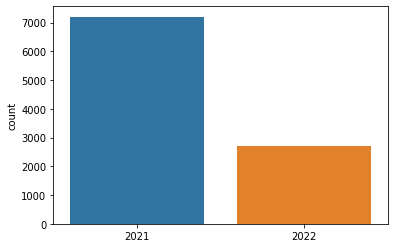

In [153]:
years = []
for i in range(len(df)):
  years.append(df['start_date'][i].year)

sns.countplot(years)

In [160]:
df['success'].value_counts() 

1    8710
0    1210
Name: success, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

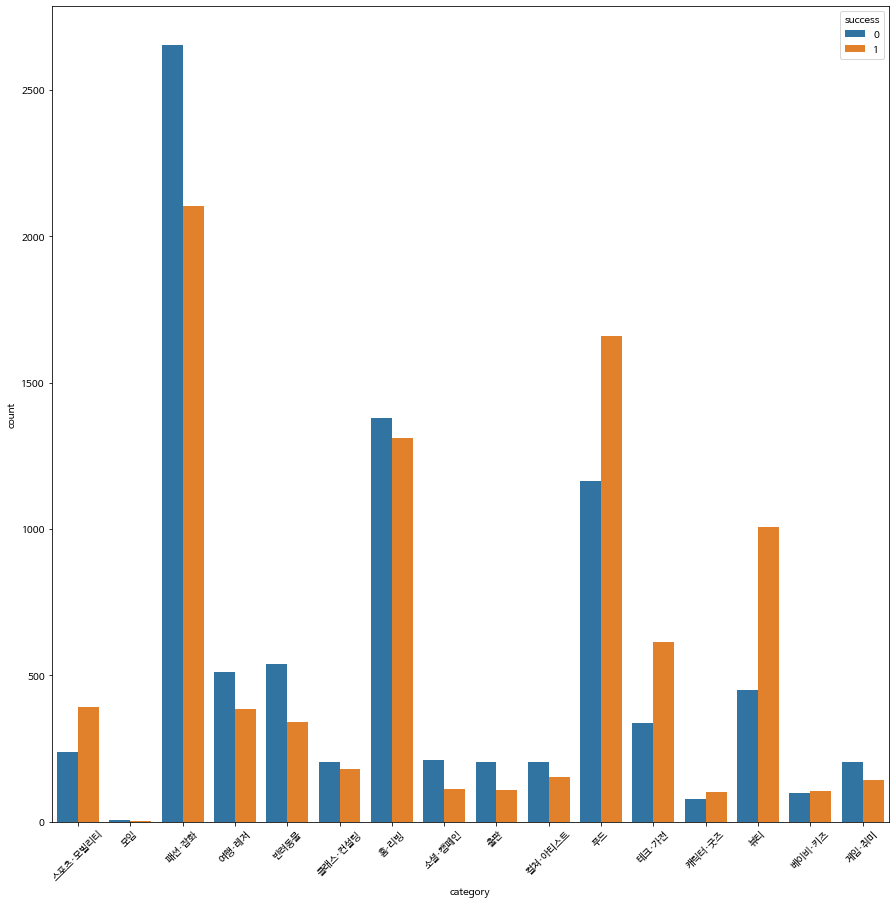

In [12]:
# success 차이 더해서 맞춰줌
tmp = df.copy()
for i in range(6):
  tmp = pd.concat([df[df['success']==0], tmp])
plt.figure(figsize=(15, 15))
sns.countplot(data=tmp, x='category', hue='success')
plt.xticks(rotation=45)

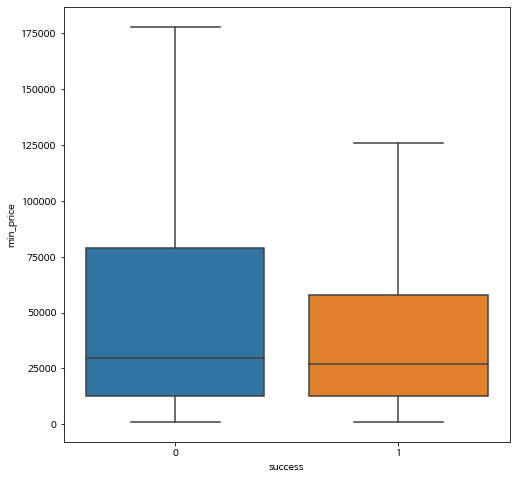

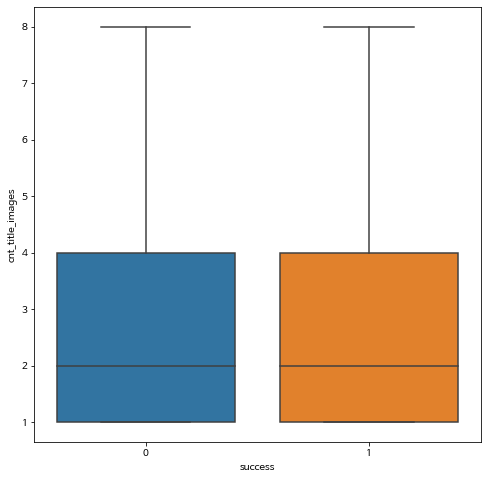

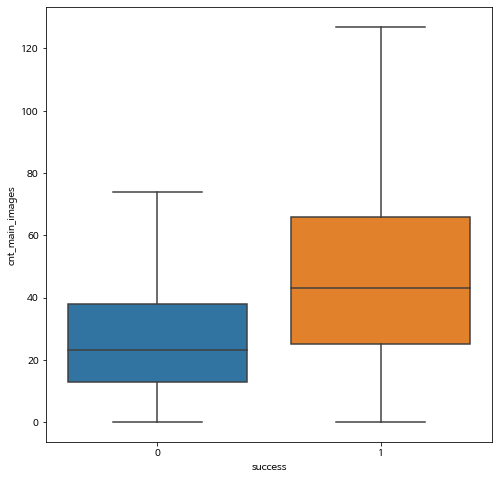

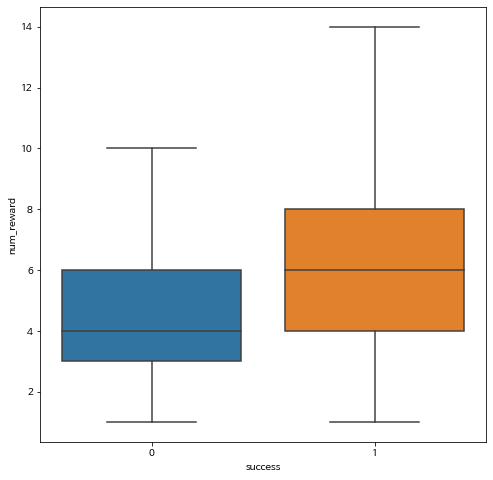

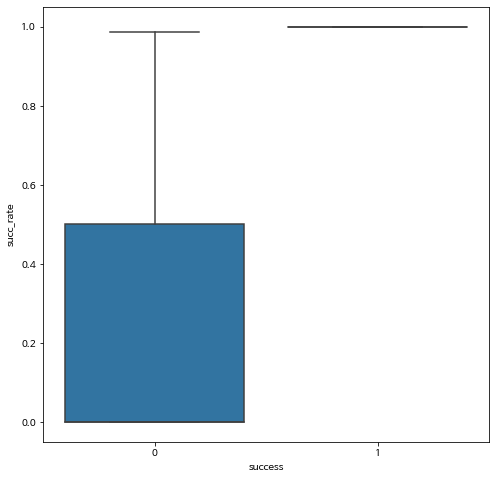

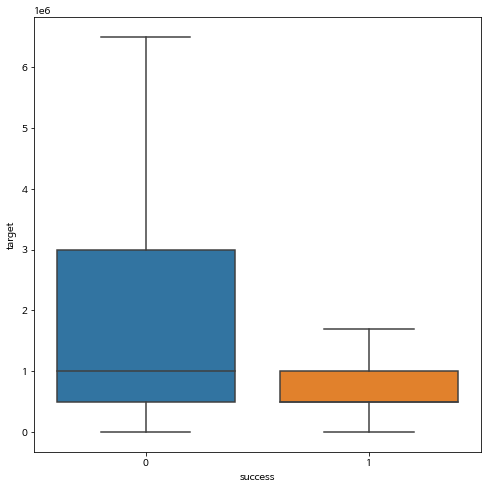

In [47]:
is_int = df.dtypes[(df.dtypes == int)].index.tolist()
is_float = df.dtypes[(df.dtypes == float)].index.tolist()
num_list = []
num_list.extend(is_int)
num_list.extend(is_float)
num_list = list(set(num_list))
num_list.remove('result')
num_list.remove('success')


for num in num_list:
  plt.figure(figsize=(8, 8))
  sns.boxplot(data=df, x='success', y=num, showfliers=False)